# Cervino HDF5 file output

### For Hansruedi

This directory contains:
* this Jupyter Notebook
* the `cervino` HDF5 file `marmousi_v15.hf`
* the SU (Seismic Unix) file `vz_gather.su` of the shot gather
* the binary file of the DFT slices, `sxx_dft_slice_0.bin`
* the 50 SU (Seismic Unix) files `vx_slice*.su` and `vx_slice*.su` of the time slices

### Import modules and packages

In [1]:
import h5py
import matplotlib.pyplot as plt

### Read the data

In [2]:
# Define the file name
fn = f'marmousi_v15.h5'
print(fn)

marmousi_v15.h5


**NOTE**

It is important to open the HDF5 file using the Python context manager:
```python
with h5py.File(fn, 'r') as f:
    print(f.attrs['groups'])
```
In this way, there is (*or should be*) no risk to corrupt the file.

Each `cervino` HDF5 output file has a `groups` attribute in the root group. This attribute lists the HDF5 groups included in the file. Each group corresponds to one of the possible `cervino` output types.

In [3]:
# Groups
with h5py.File(fn, 'r') as f:
    print(f.attrs['groups'])

['shot_gather' 'slice_time' 'slice_dft']


Each group has a `datasets` attribute. This attribute lists the datasets included in the group.

In [4]:
# Datasets for each group
with h5py.File(fn, 'r') as f:
    for item in f.keys():
        print(list(f[item].attrs['datasets']))

['vz_gather']
['sxx_dft_slice']
['vx_slice', 'vz_slice']


In [5]:
# DFT slices
with h5py.File(fn, 'r') as f:
    nf, nz, nx = f['slice_dft']['sxx_dft_slice'].shape

print(f"There are {nf} frequency slices")
print(f"The shape of each slice is ({nx}, {nz})")

There are 16 frequency slices
The shape of each slice is (2301, 751)


In [6]:
# Time slices
with h5py.File(fn, 'r') as f:
    nt, nx, nz = f['slice_time']['vx_slice'].shape

print(f"There are {nt} time slices")
print(f"The shape of each slice is ({nx}, {nz})")

There are 50 time slices
The shape of each slice is (2301, 751)


**Note**: the shape of DFT slices is the transpose of the time slices.

In [7]:
# Gathers
with h5py.File(fn, 'r') as f:
    nr, nt = f['shot_gather']['vz_gather'].shape

print(f"The shape of each slice is ({nr}, {nt})")

The shape of each slice is (2301, 501)


## Plot the data

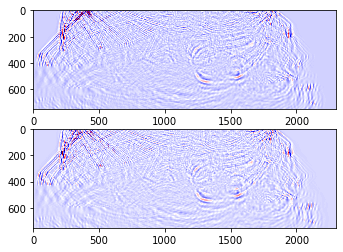

In [8]:
# DFT slices
with h5py.File(fn, 'r') as f:
    fig, ax = plt.subplots(nrows=2, ncols=1)
    ax[0].imshow(f['slice_dft']['sxx_dft_slice'][12].real, cmap=plt.cm.seismic)
    ax[1].imshow(f['slice_dft']['sxx_dft_slice'][12].imag, cmap=plt.cm.seismic)

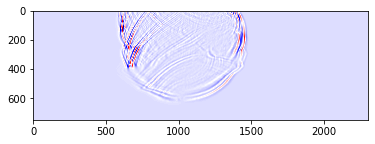

In [9]:
# Time slices
with h5py.File(fn, 'r') as f:
    plt.imshow(f['slice_time']['vx_slice'][27].T, cmap=plt.cm.seismic)

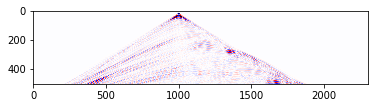

In [10]:
# Gathers
clip = 5e-10
with h5py.File(fn, 'r') as f:
    plt.imshow(f['shot_gather']['vz_gather'][:].T, cmap=plt.cm.seismic, vmin=-clip, vmax=clip)